In [1]:
import pandas as pd
from numpy import zeros
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from collections import Counter
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Merge, Dropout, LSTM, GRU, Bidirectional
from keras.models import Model,Sequential
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, make_scorer, recall_score, precision_score, classification_report, precision_recall_fscore_support

Using TensorFlow backend.
/Users/akshay/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
comments = pd.read_csv('data/formspring_data_1.csv',sep = '\t')

In [3]:
def get_label(post):
    label = 1 if ((post.ans1 == "Yes" and post.ans2 == "Yes") or (post.ans2 == "Yes" and post.ans3 == "Yes") or (post.ans1 == "Yes" and post.ans3 == "Yes")) else 0
    return label
comments['attack'] = comments.apply(get_label, axis=1)

In [4]:
import string
comments['post'] = comments['post'].apply(lambda x: x.replace('Q:',' ').replace('A:',' ').replace('<br>',' '))
comments['post'] = comments['post'].apply(lambda x: x.replace(':D',' '))
comments['post'] = comments['post'].apply(lambda x: "".join(l for l in x if l not in string.punctuation))
comments['post']=comments['post'].apply(lambda x: "".join(l for l in x if not l.isdigit()))
comments['post']=comments['post'].apply(lambda x:"".join(x).lower())

In [5]:
comments

,userid,post,ques,ans,asker,ans1,severity1,ans2,severity2,ans3,severity3,attack
0,aguitarplayer94,whats your favorite song i like too many...,what&#039;s your favorite song? :D<br>,I like too many songs to have a favorite,None,No,0,No,0,No,0,0
1,aprilpooh15,haha jk,<3,</3 ? haha jk! <33,None,No,0,No,0,No,0,0
2,aprilpooh15,quothey angel you duh sexyquot really tha...,&quot;hey angel you duh sexy&quot;,Really?!?! Thanks?! haha,None,No,0,No,0,No,0,0
3,aprilpooh15,,(:,;(,None,No,0,No,0,No,0,0
4,aprilpooh15,meowww rawr,******************MEOWWW*************************,*RAWR*?,None,No,0,No,0,No,0,0
5,aprilpooh15,any makeup tips i suck at doing my makeup lo...,any makeup tips? i suck at doing my makeup lol,Sure! Like tell me wht u wnna know?! Like wht...,None,No,0,No,0,No,0,0
6,aprilpooh15,apriiiiiiiiiiiill i miss uuuu its emma btw h...,Apriiiiiiiiiiiill!!! I miss uuuu! It&#039;s Em...,EMMA hahahahah :D I MISSSSSeddd YUHHHHh 22222...,JustinBSource,No,0,No,0,No,0,0
7,aprilpooh15,are you a morning or night person night sh...,Are you a morning or night person?,Night 4shuree!!,None,No,0,No,0,No,None,0
8,aprilpooh15,are you a trusting person alreadi answrd,are you a trusting person?,alreadi answrd,None,No,0,No,0,No,0,0
9,aprilpooh15,are you a trusting person yes veryy trusti...,are you a trusting person?,Yes veryy trustin person!!! May i help yuh:!,None,No,0,No,0,No,0,0


In [6]:
new_comments=comments[comments['attack']==1]
# comments=comments.append(new_comments)
# comments=comments.append(new_comments)
print(len(comments))
print(len(comments[comments['attack']==1]))

12773
776


(array([ 11997.,    776.]),
 array([ 0. ,  0.5,  1. ]),
 <a list of 2 Patch objects>)

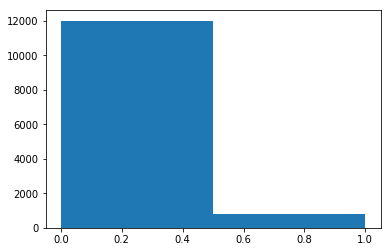

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(comments.attack,bins=2)

In [8]:
comments.iloc[0]['post'].split(" ")

['',
 '',
 'whats',
 'your',
 'favorite',
 'song',
 '',
 '',
 '',
 '',
 'i',
 'like',
 'too',
 'many',
 'songs',
 'to',
 'have',
 'a',
 'favorite']

In [35]:
word_postive_counter=Counter()
word_negative_counter=Counter()
total_count_counter=Counter()
for i in range(len(comments['post'])):
    if comments['attack'].iloc[i]==1:
        for word in comments.iloc[i]['post'].split(" "):
            word_negative_counter[word]=word_negative_counter.get(word,0)+1
            total_count_counter[word]=total_count_counter.get(word,0)+1
    
    else:
        for word in comments.iloc[i]['post'].split(" "):
            word_postive_counter[word]=word_postive_counter.get(word,0)+1
            total_count_counter[word]=total_count_counter.get(word,0)+1

In [36]:
pos_neg_ratios = Counter()
for term,cnt in list(total_count_counter.most_common()):
    if(cnt > 30):
        pos_neg_ratio = word_postive_counter[term] / float(word_negative_counter[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

In [38]:
pos_neg_ratios.most_common()

[('favorite', 165.0),
 ('miss', 159.0),
 ('family', 153.0),
 ('home', 153.0),
 ('money', 147.0),
 ('usually', 109.0),
 ('music', 108.0),
 ('choose', 105.0),
 ('often', 103.0),
 ('youve', 100.0),
 ('relationship', 100.0),
 ('first', 99.33333333333333),
 ('morning', 88.0),
 ('kiss', 88.0),
 ('amazing', 85.0),
 ('tomorrow', 83.0),
 ('dream', 83.0),
 ('etc', 81.0),
 ('thought', 80.5),
 ('bed', 79.5),
 ('loved', 79.0),
 ('beer', 75.0),
 ('few', 75.0),
 ('havent', 74.5),
 ('p', 68.9090909090909),
 ('work', 68.33333333333333),
 ('movie', 68.0),
 ('hear', 68.0),
 ('which', 66.75),
 ('house', 64.0),
 ('chocolate', 64.0),
 ('country', 64.0),
 ('describe', 64.0),
 ('quot', 64.0),
 ('awesome', 63.0),
 ('tonight', 63.0),
 ('spend', 63.0),
 ('water', 63.0),
 ('sometimes', 62.5),
 ('gaga', 62.0),
 ('sleep', 61.0),
 ('walk', 61.0),
 ('whataposs', 61.0),
 ('could', 60.42857142857143),
 ('black', 59.0),
 ('men', 59.0),
 ('cold', 59.0),
 ('where', 58.833333333333336),
 ('parents', 58.0),
 ('things', 57.1

In [10]:
word_negative_counter.most_common()

[('', 4106),
 ('you', 769),
 ('i', 556),
 ('a', 410),
 ('and', 341),
 ('your', 336),
 ('to', 319),
 ('the', 252),
 ('me', 200),
 ('u', 165),
 ('dont', 163),
 ('not', 161),
 ('it', 159),
 ('is', 157),
 ('that', 156),
 ('im', 154),
 ('my', 146),
 ('are', 139),
 ('bitch', 138),
 ('of', 135),
 ('so', 131),
 ('like', 129),
 ('do', 127),
 ('fake', 115),
 ('have', 111),
 ('get', 110),
 ('r', 108),
 ('no', 102),
 ('on', 99),
 ('know', 98),
 ('who', 94),
 ('be', 94),
 ('for', 91),
 ('fuck', 90),
 ('in', 89),
 ('what', 86),
 ('with', 86),
 ('lol', 86),
 ('shit', 85),
 ('her', 85),
 ('ur', 82),
 ('ass', 82),
 ('if', 81),
 ('she', 81),
 ('just', 79),
 ('one', 74),
 ('why', 73),
 ('how', 72),
 ('up', 72),
 ('fucking', 70),
 ('but', 70),
 ('this', 67),
 ('stop', 64),
 ('think', 63),
 ('ugly', 62),
 ('life', 61),
 ('haha', 61),
 ('would', 60),
 ('go', 59),
 ('youre', 59),
 ('love', 59),
 ('all', 58),
 ('was', 56),
 ('out', 55),
 ('about', 55),
 ('off', 50),
 ('people', 48),
 ('can', 47),
 ('say', 46)

In [11]:
word_postive_counter.most_common()

[('', 67545),
 ('you', 10808),
 ('i', 10167),
 ('to', 5978),
 ('the', 5918),
 ('a', 5528),
 ('and', 4623),
 ('do', 3630),
 ('it', 3449),
 ('is', 2817),
 ('in', 2755),
 ('your', 2711),
 ('have', 2657),
 ('of', 2652),
 ('what', 2611),
 ('that', 2515),
 ('my', 2479),
 ('lol', 2132),
 ('me', 2054),
 ('like', 1942),
 ('are', 1931),
 ('if', 1906),
 ('would', 1896),
 ('on', 1812),
 ('u', 1801),
 ('or', 1795),
 ('but', 1756),
 ('be', 1749),
 ('for', 1702),
 ('so', 1695),
 ('was', 1608),
 ('im', 1603),
 ('not', 1518),
 ('dont', 1498),
 ('with', 1430),
 ('think', 1347),
 ('how', 1335),
 ('no', 1234),
 ('its', 1231),
 ('know', 1210),
 ('love', 1096),
 ('just', 1051),
 ('haha', 992),
 ('who', 963),
 ('when', 954),
 ('one', 948),
 ('can', 939),
 ('why', 935),
 ('all', 927),
 ('about', 915),
 ('ever', 914),
 ('they', 914),
 ('at', 911),
 ('get', 906),
 ('really', 859),
 ('yes', 822),
 ('up', 781),
 ('out', 779),
 ('p', 758),
 ('this', 739),
 ('them', 714),
 ('people', 714),
 ('as', 706),
 ('go', 668

In [39]:
for word,ratio in pos_neg_ratios.most_common():
    pos_neg_ratios[word] = np.log(ratio)

In [41]:
pos_neg_ratios.most_common()

[('favorite', 5.1059454739005803),
 ('miss', 5.0689042022202315),
 ('family', 5.0304379213924353),
 ('home', 5.0304379213924353),
 ('money', 4.990432586778736),
 ('usually', 4.6913478822291435),
 ('music', 4.6821312271242199),
 ('choose', 4.6539603501575231),
 ('often', 4.6347289882296359),
 ('youve', 4.6051701859880918),
 ('relationship', 4.6051701859880918),
 ('first', 4.5984811978372946),
 ('morning', 4.4773368144782069),
 ('kiss', 4.4773368144782069),
 ('amazing', 4.4426512564903167),
 ('tomorrow', 4.4188406077965983),
 ('dream', 4.4188406077965983),
 ('etc', 4.3944491546724391),
 ('thought', 4.3882571844245177),
 ('bed', 4.3757570216602861),
 ('loved', 4.3694478524670215),
 ('beer', 4.3174881135363101),
 ('few', 4.3174881135363101),
 ('havent', 4.3107991253855138),
 ('p', 4.232788112844001),
 ('work', 4.2243976904702984),
 ('movie', 4.219507705176107),
 ('hear', 4.219507705176107),
 ('which', 4.2009542972803589),
 ('house', 4.1588830833596715),
 ('chocolate', 4.1588830833596715),


In [12]:
t=Tokenizer()
t.fit_on_texts(comments['post'])
print(t.word_index.items)
vocab_size = len(t.word_index) + 1
print(vocab_size)
# integer encode the documents
encoded_docs = t.texts_to_sequences(comments['post'])
# print((encoded_docs))

<built-in method items of dict object at 0x1a2c2f6ea0>
20225


In [13]:
print(encoded_docs[-1])
print(comments['post'].iloc[12772])
print(labels[12772])

print('-------------------------')

print(encoded_docs[0])
print(comments['post'].iloc[0])
print(labels[0])

print('-------------------------')

print(encoded_docs[12744])
print(comments['post'].iloc[12744])
print(labels[12744])

[21, 2, 208, 22, 2175, 8, 23, 92, 8, 49, 4, 993, 297, 26, 8, 23, 92, 430, 6191, 19, 5, 95, 31, 5, 201, 20224, 1038]
  if i told u den it would make it all the less fun   or it would make yuh loook like a person not a fake scaredyy cat 


NameError: name 'labels' is not defined

In [23]:
max_length=0
for i in range(0,len(encoded_docs)):
    count=0
    count=len(encoded_docs[i])
    if count>max_length:
        max_length=count
print(max_length)

padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_docs.shape

1067


(12773, 1067)

In [24]:
labels=comments['attack']
labels=to_categorical(labels)
print(labels.shape)

(12773, 2)


In [42]:
print(comments['post'].iloc[12760])
print(padded_docs[-1])
print(labels[-1])

  your  years old o dumbass  pedifile     you feel better now  if you dont want to talk to me  then just say so
[ 21   2 208 ...,   0   0   0]
[ 1.  0.]


In [26]:
from numpy import asarray
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:51], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [27]:
len(embeddings_index['the'])

50

In [28]:
embedding_matrix = zeros((vocab_size,50))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [29]:
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Merge, Dropout, LSTM, GRU, Bidirectional
from keras.models import Model,Sequential
from keras import optimizers

In [30]:
model = Sequential()
embed = Embedding(vocab_size, 50,weights=[embedding_matrix], input_length=max_length, trainable=True)
model.add(embed)
model.add(Dropout(0.25))
model.add(LSTM(100))
model.add(Dropout(0.50))
model.add(Dense(2, activation='sigmoid'))
adam = optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1067, 50)          1011250   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1067, 50)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 1,071,852
Trainable params: 1,071,852
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
from sklearn import metrics
def evaluate_model(model, testX, testY):
    temp = model.predict(testX)
    y_pred  = np.argmax(temp, 1)
    y_true = np.argmax(testY, 1)
    precision = metrics.precision_score(y_true, y_pred, average=None)
    recall = metrics.recall_score(y_true, y_pred, average=None)
    f1_score = metrics.f1_score(y_true, y_pred, average=None)
    print("Precision: " + str(precision) + "\n")
    print("Recall: " + str(recall) + "\n")
    print("f1_score: " + str(f1_score) + "\n")
    print(confusion_matrix(y_true, y_pred))
    print(":: Classification Report")
    print(classification_report(y_true, y_pred))
    return precision, recall, f1_score

In [32]:
# !pip install imblearn
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
X_train,X_test,Y_train,Y_test=train_test_split(padded_docs,labels,test_size=0.2)
# sm = SMOTE(random_state=12, ratio = 1.0)
# x_res, y_res = sm.fit_sample(X_train,Y_train)
# y_res=to_categorical(y_res)
XT_train,XV_test,YT_train,YV_test=train_test_split(X_train,Y_train,test_size=0.2)

In [33]:
print(Y_train.shape)
print(XT_train.shape)
print(YT_train.shape)

(10218, 2)
(8174, 1067)
(8174, 2)


In [34]:
# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best_lstm.hdf5', verbose=2, 
                               save_best_only=True)
hist = model.fit(XT_train, YT_train, batch_size=128, epochs=1,callbacks=[checkpointer], 
          verbose=1, shuffle=True,validation_data=(XV_test, YV_test))
loss, accuracy = model.evaluate(X_test,Y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

Train on 8174 samples, validate on 2044 samples
Epoch 1/1
8064/8174 [============================>.] - ETA: 4s - loss: 0.3214 - acc: 0.9389
Epoch 00001: val_loss improved from inf to 0.21403, saving model to model.weights.best_lstm.hdf5
2555/2555 [==============================] - 30s 12ms/step
Accuracy: 93.502935


In [182]:
print(padded_docs[-1].shape[0])
print(padded_docs[-1].shape)
new_test=padded_docs[-1].reshape(1,padded_docs[-1].shape[0])
print(new_test.shape)
print(labels[-1])
model.predict(new_test)

1067
(1067,)
(1, 1067)
[ 1.  0.]


array([[ 0.98975617,  0.0609891 ]], dtype=float32)

In [183]:
# from sklearn.metrics import classification_report
# pred = model.predict(X_test)
# predicted = np.argmax(pred, axis=1)
# print(classification_report(np.argmax(Y_test,axis=1),predicted))
evaluate_model(model,X_test,Y_test)

Precision: [ 0.9444227  0.       ]

Recall: [ 1.  0.]

f1_score: [ 0.97141707  0.        ]

[[2413    0]
 [ 142    0]]
:: Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2413
           1       0.00      0.00      0.00       142

   micro avg       0.94      0.94      0.94      2555
   macro avg       0.47      0.50      0.49      2555
weighted avg       0.89      0.94      0.92      2555



/Users/akshay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/akshay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/akshay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([ 0.9444227,  0.       ]),
 array([ 1.,  0.]),
 array([ 0.97141707,  0.        ]))

In [85]:
blstm = Sequential()
blstm.add(Embedding(vocab_size, 100, input_length=max_length,trainable=True))
blstm.add(Dropout(0.25))
blstm.add(Bidirectional(LSTM(100)))
blstm.add(Dropout(0.50))
blstm.add(Dense(2, activation='softmax'))
adam = optimizers.Adam(lr=0.01)
blstm.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(blstm.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1067, 100)         2022500   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1067, 100)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 402       
Total params: 2,183,702
Trainable params: 2,183,702
Non-trainable params: 0
_________________________________________________________________
None


In [86]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = blstm.fit(XT_train, YT_train, batch_size=256, epochs=1,callbacks=[checkpointer], 
          verbose=1, shuffle=True,validation_data=(XV_test, YV_test))
loss, accuracy = model.evaluate(X_test,Y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

Train on 15372 samples, validate on 3844 samples
Epoch 1/1
15360/15372 [============================>.] - ETA: 1s - loss: 0.5918 - acc: 0.6772 
Epoch 00001: val_loss improved from inf to 0.47006, saving model to model.weights.best.hdf5
2555/2555 [==============================] - 29s 11ms/step
Accuracy: 93.502935


In [220]:
evaluate_model(model,X_test,Y_test)

Precision: [ 0.76353904  0.        ]

Recall: [ 1.  0.]

f1_score: [ 0.8659168  0.       ]

[[2425    0]
 [ 751    0]]
:: Classification Report
             precision    recall  f1-score   support

          0       0.76      1.00      0.87      2425
          1       0.00      0.00      0.00       751

avg / total       0.58      0.76      0.66      3176



/Users/akshay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/akshay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/akshay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([ 0.76353904,  0.        ]),
 array([ 1.,  0.]),
 array([ 0.8659168,  0.       ]))